To use this python package, I had to pip install it. Upon doing this I was told I needed to upgrade other packages so I did this but then other things did not work, can fix the errors that arise but am worried packages wont be inline with what teachers have now have upgraded??

In [25]:
!pip list

Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.9.12
anaconda-project                   0.8.3
argh                               0.26.2
asn1crypto                         1.3.0
astroid                            2.4.2
astropy                            4.0.1.post1
atomicwrites                       1.4.0
attrs                              19.3.0
autopep8                           1.5.3
Babel                              2.8.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                             3.1.7
beautifulsoup4                     4.9.1
bitarray                           1.4.0
bkcharts                           0.2
bleach                         

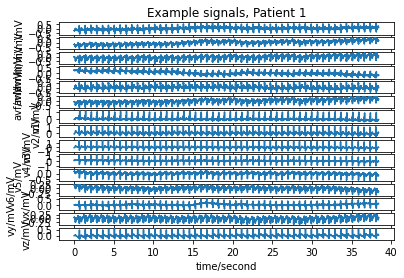

In [125]:
#import the WFDB package
import wfdb
import pandas as pd

# load a record using the 'rdrecord' function
record = wfdb.rdrecord('ptb-diagnostic-ecg-database-1.0.0/ptb-diagnostic-ecg-database-1.0.0/patient001/s0010_re')

#plotting the record
wfdb.plot_wfdb(record=record, title='Example signals, Patient 1')

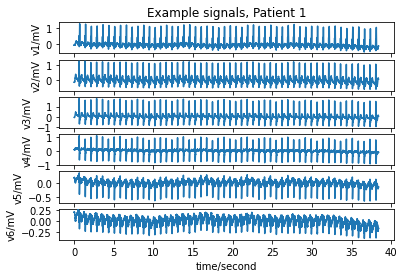

In [110]:
#can chose specific channels to output directly
channel_names = ["v1", "v2", "v3", "v4", "v5", "v6"]
desired_channel_record = wfdb.rdrecord('ptb-diagnostic-ecg-database-1.0.0/ptb-diagnostic-ecg-database-1.0.0/patient001/s0010_re', channel_names = channel_names)
#plotting the record
wfdb.plot_wfdb(record=desired_channel_record, title='Example signals, Patient 1')

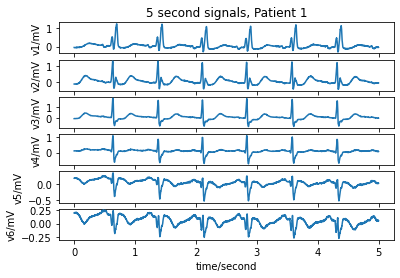

In [111]:
#can limit the smaple length read in using sampto and sampfrom
limited_record = wfdb.rdrecord('ptb-diagnostic-ecg-database-1.0.0/ptb-diagnostic-ecg-database-1.0.0/patient001/s0010_re', channel_names = channel_names, sampto = 5000)
#plotting the record
wfdb.plot_wfdb(record=limited_record, title='5 second signals, Patient 1')

In [112]:
#have instant access to the meta data using rdsamp
signal, fields = wfdb.rdsamp('ptb-diagnostic-ecg-database-1.0.0/ptb-diagnostic-ecg-database-1.0.0/patient001/s0010_re')
print(fields)

{'fs': 1000, 'sig_len': 38400, 'n_sig': 15, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz'], 'comments': ['age: 81', 'sex: female', 'ECG date: 01/10/1990', 'Diagnose:', 'Reason for admission: Myocardial infarction', 'Acute infarction (localization): infero-latera', 'Former infarction (localization): no', 'Additional diagnoses: Diabetes mellitus', 'Smoker: no', 'Number of coronary vessels involved: 1', 'Infarction date (acute): 29-Sep-90', 'Previous infarction (1) date: n/a', 'Previous infarction (2) date: n/a', 'Hemodynamics:', 'Catheterization date: 16-Oct-90', 'Ventriculography: Akinesia inferior wall', 'Chest X-ray: Heart size upper limit of norm', 'Peripheral blood Pressure (syst/diast):  140/80 mmHg', 'Pulmonary artery pressure (at rest) (syst/diast): n/a', 'Pulmonary artery pressure (at

In [86]:
#accessing just the comments
print(fields['comments'])

['age: 81', 'sex: female', 'ECG date: 01/10/1990', 'Diagnose:', 'Reason for admission: Myocardial infarction', 'Acute infarction (localization): infero-latera', 'Former infarction (localization): no', 'Additional diagnoses: Diabetes mellitus', 'Smoker: no', 'Number of coronary vessels involved: 1', 'Infarction date (acute): 29-Sep-90', 'Previous infarction (1) date: n/a', 'Previous infarction (2) date: n/a', 'Hemodynamics:', 'Catheterization date: 16-Oct-90', 'Ventriculography: Akinesia inferior wall', 'Chest X-ray: Heart size upper limit of norm', 'Peripheral blood Pressure (syst/diast):  140/80 mmHg', 'Pulmonary artery pressure (at rest) (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (mean): n/a', 'Pulmonary capillary wedge pressure (at rest): n/a', 'Cardiac output (at rest): n/a', 'Cardiac index (at rest): n/a', 'Stroke volume index (at rest): n/a', 'Pulmonary artery pressure (laod) (syst/diast): n/a', 'Pulmonary artery pressure (laod) (mean): n/a', 'Pulmonary capillary we

In [87]:
#can print just a specific aspect of the meta data eg age:
print(fields['comments'][0])

age: 81


In [88]:
#the other return from rdsamp is not the same as the record object, is a 2D array containing each channel
print(signal)

[[-0.2445 -0.229   0.0155 ... -0.0015  0.06   -0.009 ]
 [-0.2425 -0.2335  0.009  ... -0.0015  0.061  -0.01  ]
 [-0.2415 -0.2345  0.007  ... -0.0035  0.0555 -0.0085]
 ...
 [ 0.152   0.2695  0.118  ...  0.079   0.036   0.031 ]
 [ 0.136   0.256   0.1205 ...  0.081   0.042   0.03  ]
 [ 0.135   0.2585  0.1245 ...  0.081   0.049   0.029 ]]


In [90]:
#however can also access all the data from the record class
print(record.comments)

['age: 81', 'sex: female', 'ECG date: 01/10/1990', 'Diagnose:', 'Reason for admission: Myocardial infarction', 'Acute infarction (localization): infero-latera', 'Former infarction (localization): no', 'Additional diagnoses: Diabetes mellitus', 'Smoker: no', 'Number of coronary vessels involved: 1', 'Infarction date (acute): 29-Sep-90', 'Previous infarction (1) date: n/a', 'Previous infarction (2) date: n/a', 'Hemodynamics:', 'Catheterization date: 16-Oct-90', 'Ventriculography: Akinesia inferior wall', 'Chest X-ray: Heart size upper limit of norm', 'Peripheral blood Pressure (syst/diast):  140/80 mmHg', 'Pulmonary artery pressure (at rest) (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (mean): n/a', 'Pulmonary capillary wedge pressure (at rest): n/a', 'Cardiac output (at rest): n/a', 'Cardiac index (at rest): n/a', 'Stroke volume index (at rest): n/a', 'Pulmonary artery pressure (laod) (syst/diast): n/a', 'Pulmonary artery pressure (laod) (mean): n/a', 'Pulmonary capillary we

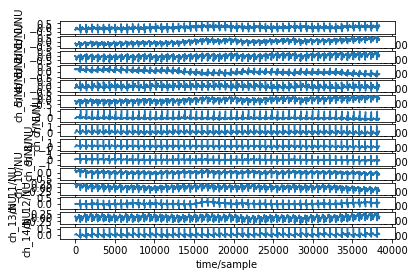

In [113]:
#also the signal can be printed 
wfdb.plot_items(signal = signal)

In [ ]:
#is a multirecord thing but dont really know what that is

In [38]:
#converting the record in a pandas dataframe and printing it
database = record.to_dataframe()
database

,i,ii,iii,avr,avl,avf,v1,v2,v3,v4,v5,v6,vx,vy,vz
0 days 00:00:00,-0.2445,-0.2290,0.0155,0.2370,-0.1300,-0.1070,-0.0440,-0.1205,-0.0560,0.1060,0.1965,0.1950,-0.0015,0.0600,-0.0090
0 days 00:00:00.001000,-0.2425,-0.2335,0.0090,0.2380,-0.1255,-0.1125,-0.0420,-0.1175,-0.0510,0.1095,0.2020,0.1980,-0.0015,0.0610,-0.0100
0 days 00:00:00.002000,-0.2415,-0.2345,0.0070,0.2380,-0.1240,-0.1140,-0.0440,-0.1180,-0.0535,0.1095,0.2005,0.1965,-0.0035,0.0555,-0.0085
0 days 00:00:00.003000,-0.2410,-0.2290,0.0120,0.2350,-0.1260,-0.1090,-0.0450,-0.1175,-0.0515,0.1115,0.2010,0.1970,-0.0020,0.0535,-0.0080
0 days 00:00:00.004000,-0.2315,-0.2270,0.0045,0.2295,-0.1180,-0.1115,-0.0455,-0.1170,-0.0495,0.1115,0.2000,0.1985,0.0005,0.0545,-0.0085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 00:00:38.395000,0.1395,0.2510,0.1125,-0.1955,0.0135,0.1820,-0.0900,0.1010,0.0785,-0.0775,-0.1250,-0.1650,0.0795,0.0230,0.0335
0 days 00:00:38.396000,0.1500,0.2590,0.1100,-0.2050,0.0200,0.1845,-0.0880,0.0985,0.0745,-0.0780,-0.1240,-0.1645,0.0795,0.0315,0.0320
0 days 00:00:38.397000,0.1520,0.2695,0.1180,-0.2110,0.0170,0.1940,-0.0835,0.0980,0.0730,-0.0775,-0.1205,-0.1615,0.0790,0.0360,0.0310
0 days 00:00:38.398000,0.1360,0.2560,0.1205,-0.1965,0.0080,0.1885,-0.0890,0.0875,0.0645,-0.0810,-0.1245,-0.1645,0.0810,0.0420,0.0300


In [54]:
specific_database = database[channel_names]
specific_database['v1']

0 days 00:00:00          -0.0440
0 days 00:00:00.001000   -0.0420
0 days 00:00:00.002000   -0.0440
0 days 00:00:00.003000   -0.0450
0 days 00:00:00.004000   -0.0455
                           ...  
0 days 00:00:38.395000   -0.0900
0 days 00:00:38.396000   -0.0880
0 days 00:00:38.397000   -0.0835
0 days 00:00:38.398000   -0.0890
0 days 00:00:38.399000   -0.0920
Freq: L, Name: v1, Length: 38400, dtype: float64

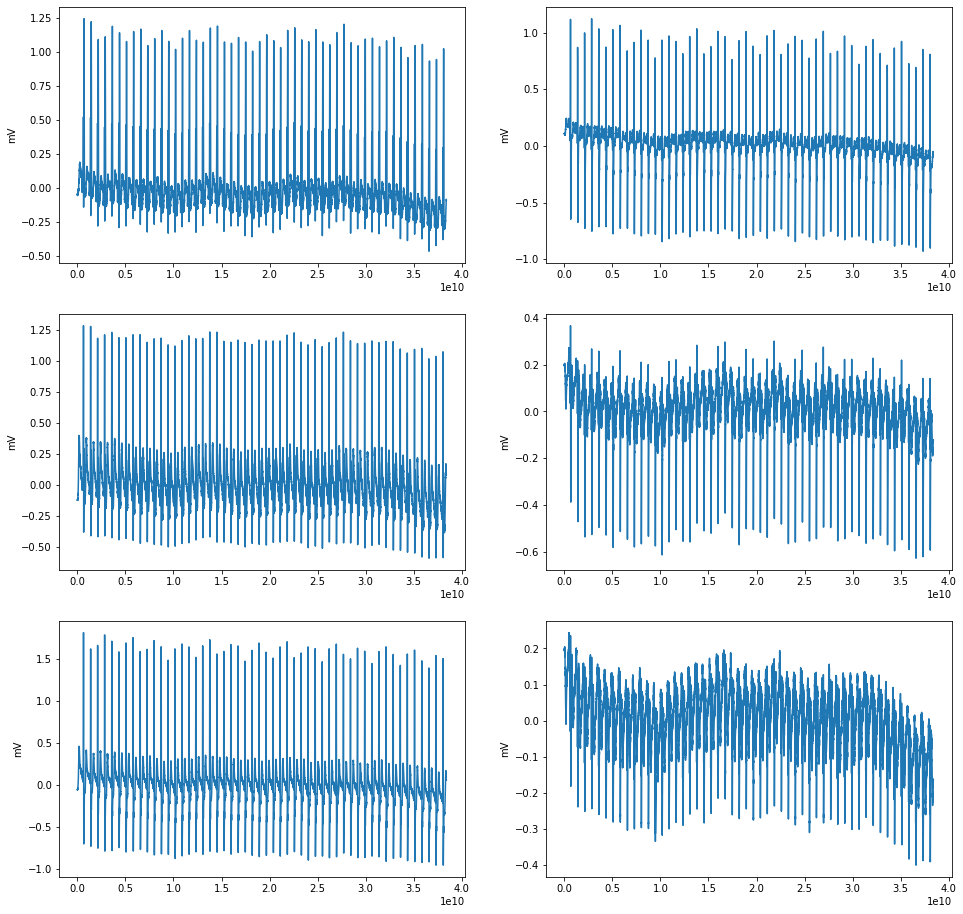

In [59]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(16, 16))

i=0
j=0
for channel in channel_names:
    axes[i, j].plot(specific_database[channel])
    axes[i, j].set_ylabel('mV')
    i+=1
    if i == 3:
        i=0
        j=1

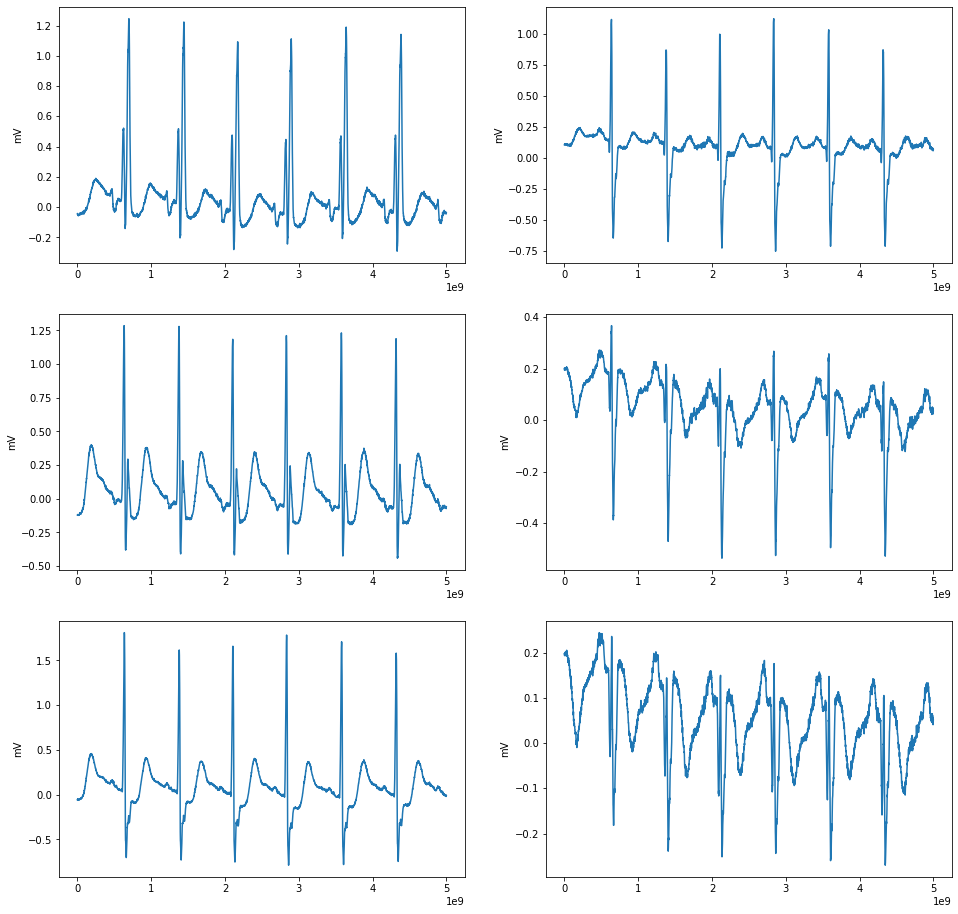

In [61]:
fig, axes = plt.subplots(3, 2, figsize=(16, 16))

i=0
j=0
for channel in channel_names:
    axes[i, j].plot(specific_database[channel].head(5000))
    axes[i, j].set_ylabel('mV')
    i+=1
    if i == 3:
        i=0
        j=1

In [100]:
#investigating annotations - no annotation files within this data base so have to do this myself
wfdb.show_ann_classes()

     extension                        description  human_reviewed
atr        atr          Reference ECG annotations            True
blh        blh         Human reviewed beat labels            True
blm        blm                Machine beat labels           False
alh        alh              Human reviewed alarms            True
alm        alm                     Machine alarms           False
qrsc      qrsc      Human reviewed QRS detections            True
qrs        qrs             Machine QRS detections           False
bph        bph  Human reviewed BP beat detections            True
bpm        bpm         Machine BP beat detections           False


In [102]:
wfdb.show_ann_labels()

    label_store symbol                                    description
0             0                              Not an actual annotation
1             1      N                                    Normal beat
2             2      L                  Left bundle branch block beat
3             3      R                 Right bundle branch block beat
4             4      a                Aberrated atrial premature beat
5             5      V              Premature ventricular contraction
6             6      F          Fusion of ventricular and normal beat
7             7      J              Nodal (junctional) premature beat
8             8      A                   Atrial premature contraction
9             9      S     Premature or ectopic supraventricular beat
10           10      E                        Ventricular escape beat
11           11      j                 Nodal (junctional) escape beat
12           12      /                                     Paced beat
13           13     

In [107]:
ann = wfdb.rdann('ptb-diagnostic-ecg-database-1.0.0/ptb-diagnostic-ecg-database-1.0.0/patient001/s0010_re', 'xyz')
#this works for some reason but does not actually have any annotations so is fine
print(ann.description)

None


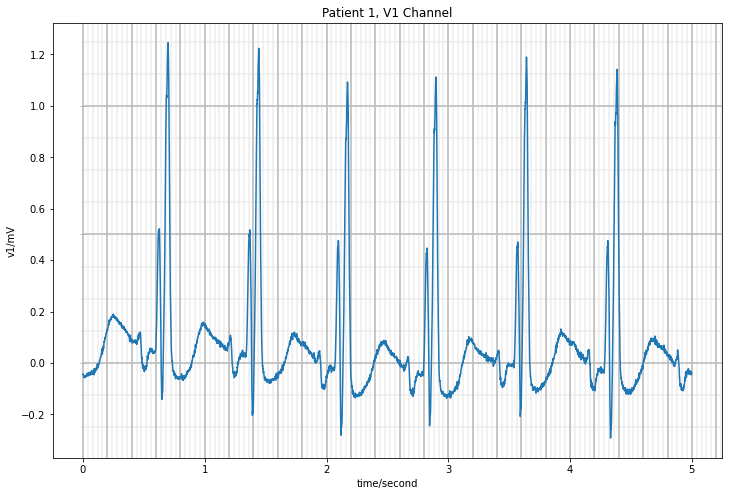

In [124]:
#producing proper plot
v1_channel_record = wfdb.rdrecord('ptb-diagnostic-ecg-database-1.0.0/ptb-diagnostic-ecg-database-1.0.0/patient001/s0010_re', channel_names = ['v1'], sampto = 5000)
#plotting the record
wfdb.plot_wfdb(record=v1_channel_record, title='Patient 1, V1 Channel', ecg_grids = [0], figsize = (12, 8))

In [ ]:
#can change x and y labels using the signal plot function but not the record plot.